# SN Explosion Boosted Dark Matter Preliminary Studies
Based on [arXiv:2206.06864](https://arxiv.org/abs/2206.06864)

In [78]:
import math
import numpy as np
import mpmath
import matplotlib.pyplot as mplot

In [96]:
# Global parameters
snLuminosity = 1.87E58 # in MeV/s
nuFlavorId = [12,-12,14,-14,16,-16] #PDG ID
nuFluxAveEnergy = [11,16,25,25,25,25] # average energy for nu flux
nuFluxEta = [3,3,3,3,3,3] # pinching
dmNumberDensityPars_LMC = [3, 68, 31.9] # n, rho_s MeV/cm3, r_s kpc

In [90]:
# Number density/Flux Functions 

#Supernova Neutrino Energy Distribution
# Fermi-Dirac with pinching
# Flavor in PDG ID, energy in MeV
def normSnFlux(flavor, energy):
    index = nuFlavorId.index(flavor)
    aveEnergy = nuFluxAveEnergy[index]
    eta = nuFluxEta[index]
    
    temperature = aveEnergy/3.99
    normFactor = -2. * mpmath.polylog(3,-math.exp(eta)) # Integral done by wolfram alpha -2*Li_3(-e^eta)
    normFlux = 1./(normFactor *  pow(temperature,3) ) * pow(energy,2)/(math.exp( energy/temperature - eta) + 1)
    return normFlux

# Supernova Neutrino Number Density
# Energy in MeV, distance in kpc
def snTotalNuDensity(energy, distance):
    totalNuDensity = 0
    distance = distance * 3.086E19 # now in meters
    for flavor in nuFlavorId:
        totalNuDensity = totalNuDensity + normSnFlux(flavor, energy) / nuFluxAveEnergy[nuFlavorId.index(flavor)]
    # Square energy term is already implemented in the flux,
    #totalNuDensity = totalNuDensity * (snLuminosity/6.) / ( 4 * math.pi * pow(distance,2) ) * pow(energy,2)
    totalNuDensity = totalNuDensity * (snLuminosity/6.) / ( 4 * math.pi * pow(distance,2) )
    return totalNuDensity


# Dark matter density
# distance in kpc and mDark in MeV
def dmNumberDensity(distance, mDark):
    distanceRatio = distance/dmNumberDensityPars_LMC[2]
    numberDensity = (dmNumberDensityPars_LMC[1] / mDark)
    numberDensity = numberDensity / ( distanceRatio * pow( (1+distanceRatio), dmNumberDensityPars_LMC[0]) )
    return numberDensity

In [110]:
# Kinematic Functions

# Theta (CM angle) in terms of alpha (lab angle)
# nuEnergy and mDark in MeV
def cmTheta(nuEnergy, mDark, alpha):
    gamma = (nuEnergy + mDark) / sqrt( mDark * (2*nuEnergy + mDark) )
    theta = 2*atan( gamma * tan(alpha) )
    return theta

# Angular Distribution
def fAngular(nuEnergy, mDark, alpha):
    gamma = (nuEnergy + mDark) / sqrt( mDark * (2*nuEnergy + mDark) )
    angular = pow(gamma,3) / ( math.pi * pow(cos,alpha)^3 * pow( 1+pow(gamma*tan(alpha), 2), 2) )
    
# DM Kinetic Energy
def dmKinetic(nuEnergy, mDark, alpha):
    theta = cmTheta(nuEnergy, mDark, alpha)
    kineticEnergy = pow(nuEnergy,2)/( nuEnergy + mDark/2. ) * (1 + cos(theta)) / 2.
    return kineticEnergy

#Tomorrow
#def nuEnergyPerFixed

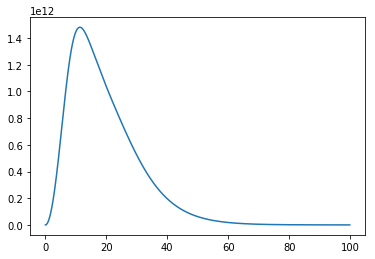

In [91]:
nuEnergy = np.arange(0,100,0.1)
nueFlux = [ snTotalNuDensity(e,50.0) for e in nuEnergy ]
mplot.plot(nuEnergy, nueFlux)
mplot.show()

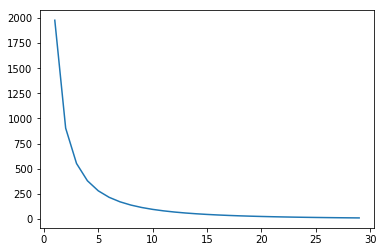

In [108]:
dmDistance = np.arange(1,30,1)
mDark = 1 #MeV
dmDensity = [ dmNumberDensity(d,mDark) for d in dmDistance ]
mplot.plot(dmDistance, dmDensity)
mplot.show()

In [ ]:
alphaRange = np.arange(0,0.5,0.01)
mDark = 10


### TEST CELLS BELOW

In [51]:
a = [1,2,3]
for x 


4.04098315229647e-5


In [40]:
eta = 3.
a = -2. * mpmath.polylog(3,-math.exp(eta))
print 3^4

7
